In [3]:
# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np
# TextBlob - Python library for processing textual data
from textblob import TextBlob


import nltk
# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
tweet_df=pd.read_csv('twitter.csv')
tweet_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
tweet_df.drop(["id","label"], axis = 1, inplace = True)
tweet_df

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
def cleans(txt):
    txt = re.sub(r'A[A-Za-z0-9_]+','',txt)
    txt = re.sub(r'#','',txt)
    txt = re.sub(r'@user','',txt)
    txt = re.sub(r'RT :','',txt)
    txt = re.sub(r'https?:\/\/A[A-Za-z0-9_]+','',txt)
    txt = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    
    return txt


In [7]:
tweet_df['tweet'].apply(cleans)
tweet_df

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?ðððððð...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [8]:
def remove_non_ascii(txt): 
    return ''.join(i for i in txt if ord(i)<128) 
tweet_df['tweet'] = tweet_df['tweet'].apply(remove_non_ascii)
tweet_df

,tweet
0,@user when a father is dysfunctional and is s...
1,@user @user thanks for #lyft credit i can't us...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate @user isz that youuu?
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"@user #sikh #temple vandalised in in #calgary,..."


In [9]:
tweet_df['tweet'] = tweet_df['tweet'].str.replace('@user','')
tweet_df

,tweet
0,when a father is dysfunctional and is so sel...
1,thanks for #lyft credit i can't use cause th...
2,bihday your majesty
3,#model i love u take with u all the time in ...
4,factsguide: society now #motivation
...,...
31957,ate isz that youuu?
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,"#sikh #temple vandalised in in #calgary, #wso..."


In [10]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [12]:
tweet_df['length']=tweet_df['tweet'].apply(len)
tweet_df

,tweet,length
0,father dysfunctional selfish drags kids dysfun...,57
1,thanks #lyft credit can't use cause offer whee...,87
2,bihday majesty,14
3,#model love u take u time ur!!!,31
4,factsguide: society #motivation,31
...,...,...
31957,ate isz youuu?,14
31958,see nina turner airwaves trying wrap mantle ge...,96
31959,listening sad songs monday morning otw work sad,47
31960,"#sikh #temple vandalised #calgary, #wso condem...",52


In [13]:
def get_Subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def get_Polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [14]:
tweet_df['Subjectivity'] = tweet_df['tweet'].apply(get_Subjectivity)
tweet_df['Polarity'] = tweet_df['tweet'].apply(get_Polarity)
tweet_df.head()

,tweet,length,Subjectivity,Polarity
0,father dysfunctional selfish drags kids dysfun...,57,1.0,-0.500000
1,thanks #lyft credit can't use cause offer whee...,87,0.2,0.200000
2,bihday majesty,14,0.0,0.000000
3,#model love u take u time ur!!!,31,0.6,0.976562
4,factsguide: society #motivation,31,0.0,0.000000


In [15]:
def applylabel(plr):
    if plr < -0.08:
        return -1
    elif plr>0.08:
        return 1
    else:
        return 0

In [16]:
tweet_df["label"] = tweet_df["Polarity"].apply(applylabel)
tweet_df

,tweet,length,Subjectivity,Polarity,label
0,father dysfunctional selfish drags kids dysfun...,57,1.0,-0.500000,-1
1,thanks #lyft credit can't use cause offer whee...,87,0.2,0.200000,1
2,bihday majesty,14,0.0,0.000000,0
3,#model love u take u time ur!!!,31,0.6,0.976562,1
4,factsguide: society #motivation,31,0.0,0.000000,0
...,...,...,...,...,...
31957,ate isz youuu?,14,0.0,0.000000,0
31958,see nina turner airwaves trying wrap mantle ge...,96,0.5,0.400000,1
31959,listening sad songs monday morning otw work sad,47,1.0,-0.500000,-1
31960,"#sikh #temple vandalised #calgary, #wso condem...",52,0.0,0.000000,0


In [17]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_df['tokenized'] = tweet_df['tweet'].apply(lambda x: tokenization(x.lower()))

In [18]:
from nltk import PorterStemmer

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

In [19]:
tweet_df['stems'] = tweet_df['tokenized'].apply(lambda x: stemming(x))

In [20]:
tweet_df

,tweet,length,Subjectivity,Polarity,label,tokenized,stems
0,father dysfunctional selfish drags kids dysfun...,57,1.0,-0.500000,-1,"[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc..."
1,thanks #lyft credit can't use cause offer whee...,87,0.2,0.200000,1,"[thanks, lyft, credit, can, t, use, cause, off...","[thank, lyft, credit, can, t, use, caus, offer..."
2,bihday majesty,14,0.0,0.000000,0,"[bihday, majesty]","[bihday, majesti]"
3,#model love u take u time ur!!!,31,0.6,0.976562,1,"[, model, love, u, take, u, time, ur, ]","[, model, love, u, take, u, time, ur, ]"
4,factsguide: society #motivation,31,0.0,0.000000,0,"[factsguide, society, motivation]","[factsguid, societi, motiv]"
...,...,...,...,...,...,...,...
31957,ate isz youuu?,14,0.0,0.000000,0,"[ate, isz, youuu, ]","[ate, isz, youuu, ]"
31958,see nina turner airwaves trying wrap mantle ge...,96,0.5,0.400000,1,"[see, nina, turner, airwaves, trying, wrap, ma...","[see, nina, turner, airwav, tri, wrap, mantl, ..."
31959,listening sad songs monday morning otw work sad,47,1.0,-0.500000,-1,"[listening, sad, songs, monday, morning, otw, ...","[listen, sad, song, monday, morn, otw, work, sad]"
31960,"#sikh #temple vandalised #calgary, #wso condem...",52,0.0,0.000000,0,"[, sikh, temple, vandalised, calgary, wso, con...","[, sikh, templ, vandalis, calgari, wso, condem..."


In [21]:
sentences = tweet_df['tweet']
sentences_string = " ".join(sentences)

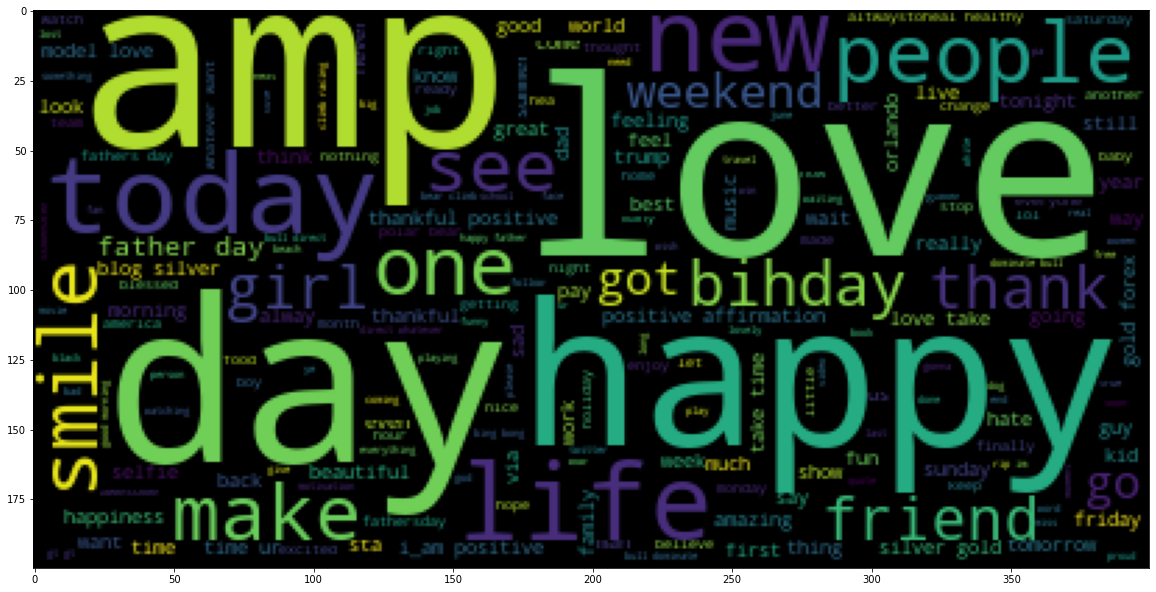

In [22]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [26]:
tweet_df.drop(['Subjectivity','Polarity','tokenized','length'],axis = 1, inplace =True)

KeyError: ignored

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 3)
tweets_countvectorizer = vectorizer.fit_transform(tweet_df['tweet'])

In [28]:
df = pd.DataFrame(tweets_countvectorizer.toarray())

In [29]:
x = df
y = tweet_df["label"]
print(x.shape , y.shape)

(31962, 9763) (31962,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

XGBT = XGBClassifier()
XGBT.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [38]:
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
NBobj = MultinomialNB()

NBobj.fit(X_train, y_train)
y_pred_NB = NBobj.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

          -1       0.60      0.65      0.63      1196
           0       0.77      0.68      0.72      3938
           1       0.78      0.84      0.81      4455

    accuracy                           0.75      9589
   macro avg       0.72      0.72      0.72      9589
weighted avg       0.75      0.75      0.75      9589



In [33]:
# Predicting the Test set results
y_pred = XGBT.predict(X_test)

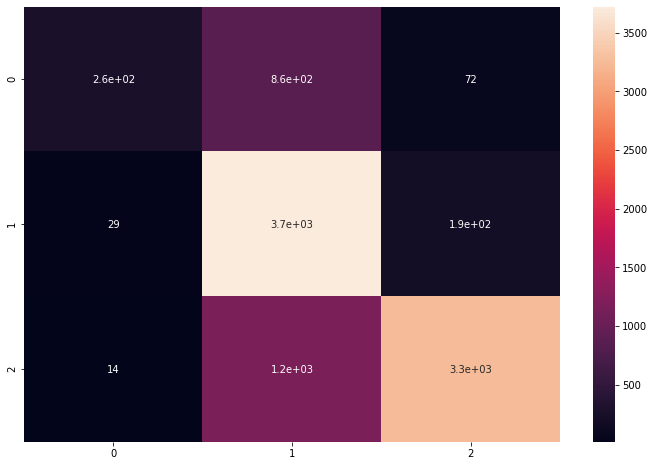

In [35]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.22      0.35      1196
           0       0.65      0.94      0.77      3938
           1       0.93      0.73      0.82      4455

    accuracy                           0.76      9589
   macro avg       0.81      0.63      0.65      9589
weighted avg       0.80      0.76      0.74      9589

